In [1]:
import numpy as np
import itertools
import pickle
import os, fnmatch
import seaborn 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.svm import LinearSVC, SVC
from sklearn.externals import joblib
from numpy.random import seed


In [2]:
from sklearn.ensemble import VotingClassifier
seed(1)
import librosa.display, librosa

In [3]:
path='C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi'

In [4]:
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.wav',):
        files.append(os.path.join(root, filename))


In [5]:
print("found %d audio files in %s"%(len(files),path))
labels =[]
classes=['cello','flute','oboe', 'sax','trumpet','viola']
color_dict={'cello':'blue', 'flute':'red', 'oboe':'green', 'trumpet':'black', 'sax':'magenta', 'viola':'yellow'}
color_list=[]
for filename in files:
    for name in classes:
        if fnmatch.fnmatchcase(filename, '*'+name+'*'):
            labels.append(name)
            color_list.append(color_dict[name])
            break
    else:
        labels.append('other')

found 465 audio files in C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi


In [6]:
labelencoder = LabelEncoder()
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
print("    ")
classes_num = labelencoder.transform(labels)


6 classes: cello, flute, oboe, sax, trumpet, viola
    


In [7]:
fs = 44100         
n_fft = 2048       
hop_length = 512   
n_mels = 128       
n_mfcc = 13        


testset_size = 0.25 
n_neighbors=1  

In [8]:
# D Calculate MFCC
def get_features(y, sr=fs):
    S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)
    feature_vector = np.mean(mfcc,1)
    #feature_vector = (feature_vector-np.mean(feature_vector))/np.std(feature_vector)
    #print("the vector",feature_vector) 
    return feature_vector

    
    #print(feature_vector)


In [9]:
#  calculate features and create feature vectors
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    print ("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f, sr=fs)
        y/=y.max() #Normalize
        if len(y) < 2:
            print("Error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except Exception as e:
        print("Error loading %s. Error: %s" % (f,e))
print("    ")       
print("Calculated %d feature vectors"%len(feature_vectors))
print("    ")

get 1 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\cello\cello_A2_025_forte_arco-normal.wav
get 2 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\cello\cello_A2_025_fortissimo_arco-normal.wav
get 3 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\cello\cello_A2_025_mezzo-forte_arco-col-legno-battuto.wav
get 4 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\cello\cello_A2_025_mezzo-piano_arco-normal.wav
get 5 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\cello\cello_A2_025_pianissimo_arco-normal.wav
get 6 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\cello\cello_A2_05_forte_arco-normal.wav
get 7 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\cello\cello_A2_05_fortissimo_arco-normal.wa

get 60 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\cello\cello_Gs3_15_pianissimo_arco-normal.wav
get 61 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\cello\cello_Gs3_15_piano_arco-normal.wav
get 62 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\cello\cello_Gs3_1_forte_arco-normal.wav
get 63 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\cello\cello_Gs3_1_mezzo-piano_arco-normal.wav
get 64 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\cello\cello_Gs3_1_pianissimo_arco-normal.wav
get 65 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\cello\cello_Gs4_025_forte_arco-normal.wav
get 66 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\cello\cello_Gs4_025_fortissimo_arco-normal.wav
get 67 

get 123 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\flute\flute_A5_15_mezzo-forte_normal.wav
get 124 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\flute\flute_A5_15_mezzo-piano_normal.wav
get 125 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\flute\flute_A5_15_pianissimo_normal.wav
get 126 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\flute\flute_A5_15_piano_normal.wav
get 127 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\flute\flute_A5_1_mezzo-piano_normal.wav
get 128 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\flute\flute_A5_1_pianissimo_normal.wav
get 129 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\flute\flute_A5_1_piano_normal.wav
get 130 of 465 = C:/Users/w10/BasicsM

get 188 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\oboe\oboe_A6_1_forte_major-trill.wav
get 189 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\oboe\oboe_A6_1_forte_minor-trill.wav
get 190 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\oboe\oboe_A6_1_piano_normal.wav
get 191 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\oboe\oboe_As3_05_forte_normal.wav
get 192 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\oboe\oboe_As3_05_fortissimo_normal.wav
get 193 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\oboe\oboe_As3_05_mezzo-forte_normal.wav
get 194 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\oboe\oboe_As3_05_piano_normal.wav
get 195 of 465 = C:/Users/w10/BasicsMusicalInstrumClas

get 250 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\sax\saxophone_A5_05_fortissimo_normal.wav
get 251 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\sax\saxophone_A5_05_pianissimo_normal.wav
get 252 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\sax\saxophone_A5_05_piano_normal.wav
get 253 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\sax\saxophone_A5_15_forte_normal.wav
get 254 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\sax\saxophone_A5_15_fortissimo_normal.wav
get 255 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\sax\saxophone_A5_15_pianissimo_normal.wav
get 256 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\sax\saxophone_A5_1_forte_normal.wav
get 257 of 465 = C:/Users/w10

get 310 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\sax\saxophone_Gs5_1_fortissimo_normal.wav
get 311 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\sax\saxophone_Gs5_1_pianissimo_normal.wav
get 312 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\sax\saxophone_Gs5_1_piano_normal.wav
get 313 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\trumpet\trumpet_A3_025_pianissimo_normal.wav
get 314 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\trumpet\trumpet_A3_05_forte_normal.wav
get 315 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\trumpet\trumpet_A3_05_pianissimo_normal.wav
get 316 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\trumpet\trumpet_A3_15_pianissimo_normal.wav
get 317 of 465

get 371 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\trumpet\trumpet_G5_025_mezzo-forte_normal.wav
get 372 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\trumpet\trumpet_G5_05_mezzo-forte_normal.wav
get 373 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\trumpet\trumpet_G5_15_mezzo-forte_normal.wav
get 374 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\trumpet\trumpet_G5_1_mezzo-forte_normal.wav
get 375 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\trumpet\trumpet_Gs3_025_pianissimo_normal.wav
get 376 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\trumpet\trumpet_Gs3_05_forte_normal.wav
get 377 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\trumpet\trumpet_Gs3_05_pianissimo_normal.

get 431 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\viola\viola_Gs4_05_mezzo-piano_arco-normal.wav
get 432 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\viola\viola_Gs4_05_pianissimo_arco-normal.wav
get 433 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\viola\viola_Gs4_05_piano_arco-normal.wav
get 434 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\viola\viola_Gs4_15_fortissimo_arco-normal.wav
get 435 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\viola\viola_Gs4_15_mezzo-piano_arco-normal.wav
get 436 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\viola\viola_Gs4_15_pianissimo_arco-normal.wav
get 437 of 465 = C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\viola\viola_Gs4_1_fortissimo_arco-

In [10]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(feature_vectors))
print("Feature vectors shape:",scaled_feature_vectors.shape)


Feature vectors shape: (465, 13)


In [11]:
#only for svm
filename="mfcc_feature_vectors.pl"
# Load mfcc features from saved file
#with open(filename, "rb") as f:
    #scaled_feature_vectors = pickle.load( open( filename, "rb" ) )
# Save feature_vectors 
with open(filename, "wb") as f:
    pickle.dump( scaled_feature_vectors, f)


In [12]:
# Create Train and Test Set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=testset_size, random_state=0)
splits = splitter.split(scaled_feature_vectors, classes_num)
for train_index, test_index in splits:
    train_set = scaled_feature_vectors[train_index]
    test_set = scaled_feature_vectors[test_index]
    train_classes = classes_num[train_index]
    test_classes = classes_num[test_index]

In [13]:
print("train_set shape:",train_set.shape)
print("test_set shape:",test_set.shape)
print("train_classes shape:",train_classes.shape)
print("test_classes shape:",test_classes.shape)
print("    ")

train_set shape: (348, 13)
test_set shape: (117, 13)
train_classes shape: (348,)
test_classes shape: (117,)
    


In [14]:
# KNN Classifier
n_neighbors=1
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# kNN
model_knn.fit(train_set, train_classes);

# Predict using the Test Set
predicted_labels = model_knn.predict(test_set)

# Recall - the ability of the classifier to find all the positive samples
#print("Recall: ", recall_score(test_classes, predicted_labels,average=None))

# Precision - The precision is intuitively the ability of the classifier not to 
#label as positive a sample that is negative
print("Precision of KNN classifer: ", precision_score(test_classes, predicted_labels,average=None))

# F1-Score - The F1 score can be interpreted as a weighted average of the precision 
#and recall
#print("F1-Score: ", f1_score(test_classes, predicted_labels, average=None))

# Accuracy - the number of correctly classified samples
print("Accuracy of KNN classifer: %.2f  ," % accuracy_score(test_classes, predicted_labels,normalize=True), accuracy_score(test_classes, predicted_labels,normalize=False) )
print("Number of samples taken :",test_classes.shape[0])
print("    ")

Precision of KNN classifer:  [1.         1.         1.         1.         1.         0.90909091]
Accuracy of KNN classifer: 0.98  , 115
Number of samples taken : 117
    


wrong predicted lables ['cello' 'sax']
number of wrong predictions [5 5]
predicted lables ['viola' 'viola']
wrong predicted files ['C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\\cello\\cello_Gs5_1_mezzo-forte_arco-harmonic.wav'
 'C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\\sax\\saxophone_Gs3_05_pianissimo_normal.wav']
   


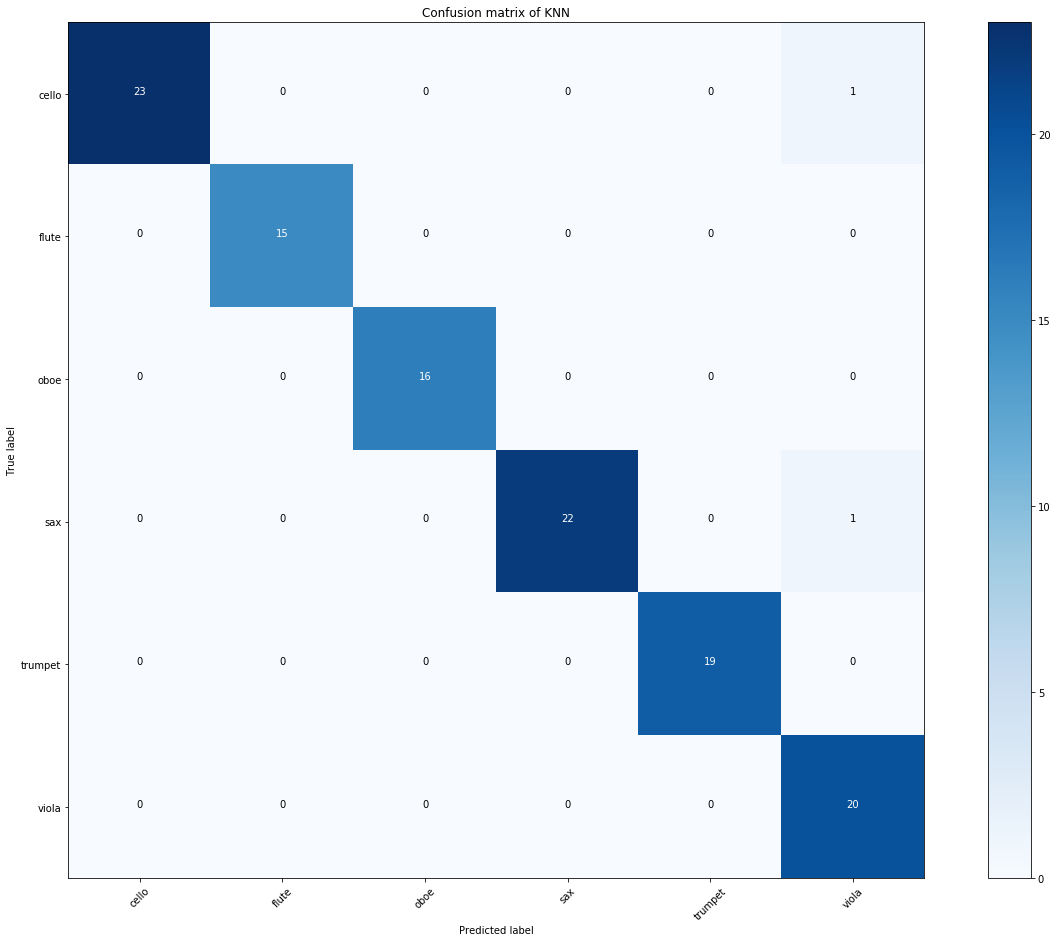

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_classes, predicted_labels)
np.set_printoptions(precision=2)

# Function to Plot Confusion Matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Plot non-normalized confusion matrix
plt.figure(figsize=(18,13))
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_,
                      title='Confusion matrix of KNN')

# Find wrong predicted samples indexes
#wrong_predictions = [i for i, (e1, e2) in enumerate(zip(test_classes, predicted_labels)) if e1 != e2]
wrong_predictions = [i for i, (e1, e2) in enumerate(zip(predicted_labels,test_classes)) if e1 != e2]

# Find wrong predicted audio files
print("wrong predicted lables",np.array(labels)[test_index[wrong_predictions]])
print("number of wrong predictions",predicted_labels[wrong_predictions].T)
print("predicted lables",labelencoder.inverse_transform(predicted_labels[wrong_predictions]))
print("wrong predicted files",np.array(files)[test_index[wrong_predictions]])
print("   ")

In [16]:
# SVM
#model_svm = LinearSVC(random_state=0, tol=1e-5, max_iter=5000)
svclassifier = SVC(kernel='rbf', C = 10.0, gamma=0.1) #radial basis function

# SVM
#model_svm.fit(train_set, train_classes);
svclassifier.fit(train_set, train_classes);

# Save
joblib.dump(svclassifier, 'trainedSVM.joblib')
#Load
#svclassifier = joblib.load('filename.joblib') 

# Predict using the Test Set
#predicted_labels = model_svm.predict(test_set)
predicted_labels = svclassifier.predict(test_set)

# Recall - the ability of the classifier to find all the positive samples
#print("Recall: ", recall_score(test_classes, predicted_labels,average=None))

# Precision - The precision is intuitively the ability of the classifier not to 
#label as positive a sample that is negative
print("Precision of SVM(RBF): ", precision_score(test_classes, predicted_labels,average=None))

# F1-Score - The F1 score can be interpreted as a weighted average of the precision 
#and recall
#print("F1-Score: ", f1_score(test_classes, predicted_labels, average=None))

# Accuracy - the number of correctly classified samples
a=( accuracy_score(test_classes, predicted_labels,normalize=True), accuracy_score(test_classes, predicted_labels,normalize=False) )
x=a[0]
#print(x)
print("Accuracy of radial basis func: %.3f  ," % accuracy_score(test_classes, predicted_labels,normalize=True), accuracy_score(test_classes, predicted_labels,normalize=False) )
print("Number of samples:",test_classes.shape[0])
print("    ")


Precision of SVM(RBF):  [1.   1.   1.   1.   1.   0.95]
Accuracy of radial basis func: 0.991  , 116
Number of samples: 117
    


wrong predicted lables ['sax']
number ofwrong predictions in a file [5]
predicted ['viola']
    
wrong predict ['C:/Users/w10/BasicsMusicalInstrumClassifi-master/audio/london_phill_dataset_multi\\sax\\saxophone_Gs3_05_pianissimo_normal.wav']
    


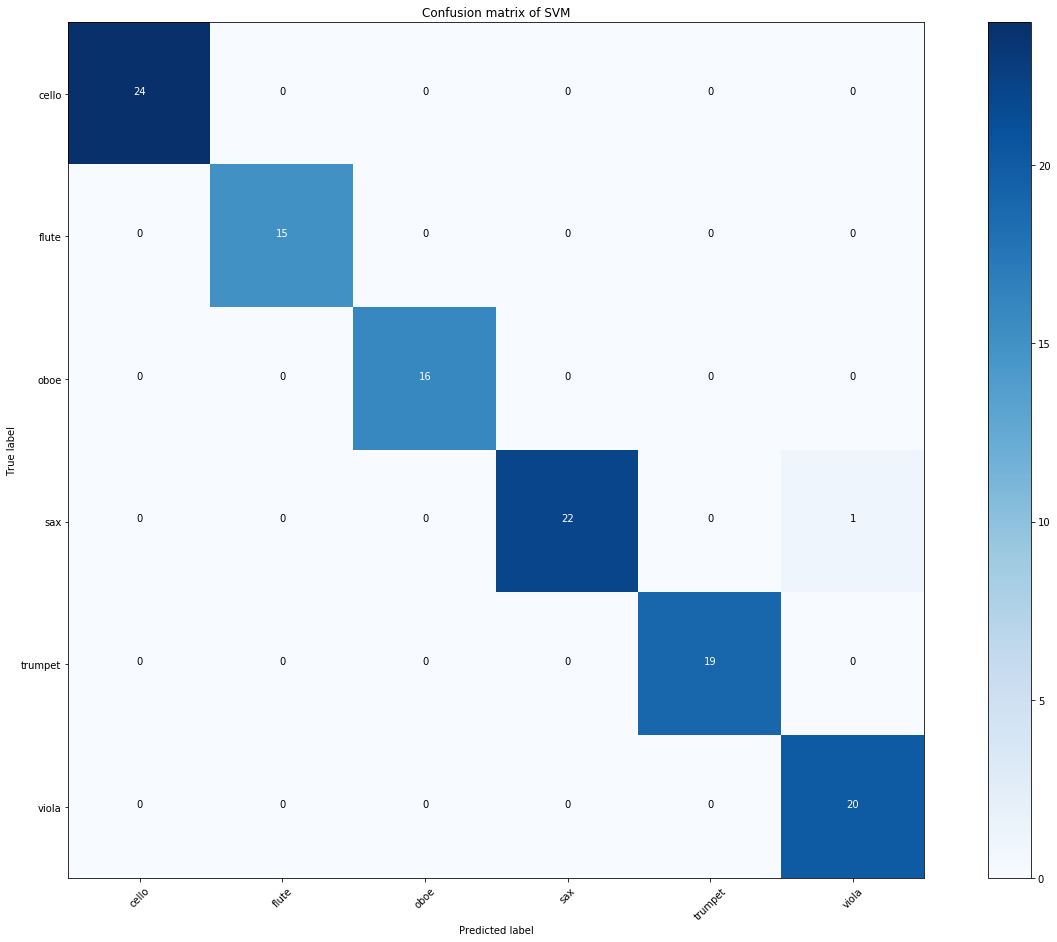

In [17]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_classes, predicted_labels)
np.set_printoptions(precision=2)

# Function to Plot Confusion Matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# Plot non-normalized confusion matrix
plt.figure(figsize=(18,13))
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_,
                      title='Confusion matrix of SVM')


wrong_predictions = [i for i, (e1, e2) in enumerate(zip(test_classes, predicted_labels)) if e1 != e2]
wrong_predictions = [i for i, (e1, e2) in enumerate(zip(predicted_labels,test_classes)) if e1 != e2]



print("wrong predicted lables",np.array(labels)[test_index[wrong_predictions]])
print('number ofwrong predictions in a file',predicted_labels[wrong_predictions].T)
print('predicted',labelencoder.inverse_transform(predicted_labels[wrong_predictions]))
print("    ")
print('wrong predict',np.array(files)[test_index[wrong_predictions]])
print("    ")
